<a href="https://colab.research.google.com/github/hadefpetriza/Kelompok5-APM/blob/Praktikum2/2_DecisionTree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Dataset Iris Ubah ke Bentuk DataFrame

In [ ]:
import pandas as pd

#load dataset
data = pd.read_csv("Iris.csv")
display(data.head())

#cek informasi data
data.info()
data.describe()
data.isnull().sum()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Hapus Kolom Id

In [ ]:
data = data.drop(columns='Id')
display(data)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Pisahkan antara atribut dan label

In [ ]:
#atribut
x = data.iloc[:,0:4].to_numpy()

#label
y = data['Species'].to_numpy()

Buat dan latih model Decision Tree.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#split data train dan data test dengan perbandingan 70% dan 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

#Membuat object Decision Tree classifer
dtree = DecisionTreeClassifier().fit(x, y)

Lakukan prediksi dengan model yang sudah dilatih

In [ ]:
from sklearn.metrics import classification_report #membuat report tingkat akurasi dari model yang dibuat
from sklearn import metrics #untuk perhitungan akurasi model

#Prediksi dari test dataset
y_predict = dtree.predict(x_test)

#membuat report hasil classification
print(classification_report(y_test, y_predict))

#membuat summary akurasi model
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


Visualisasi

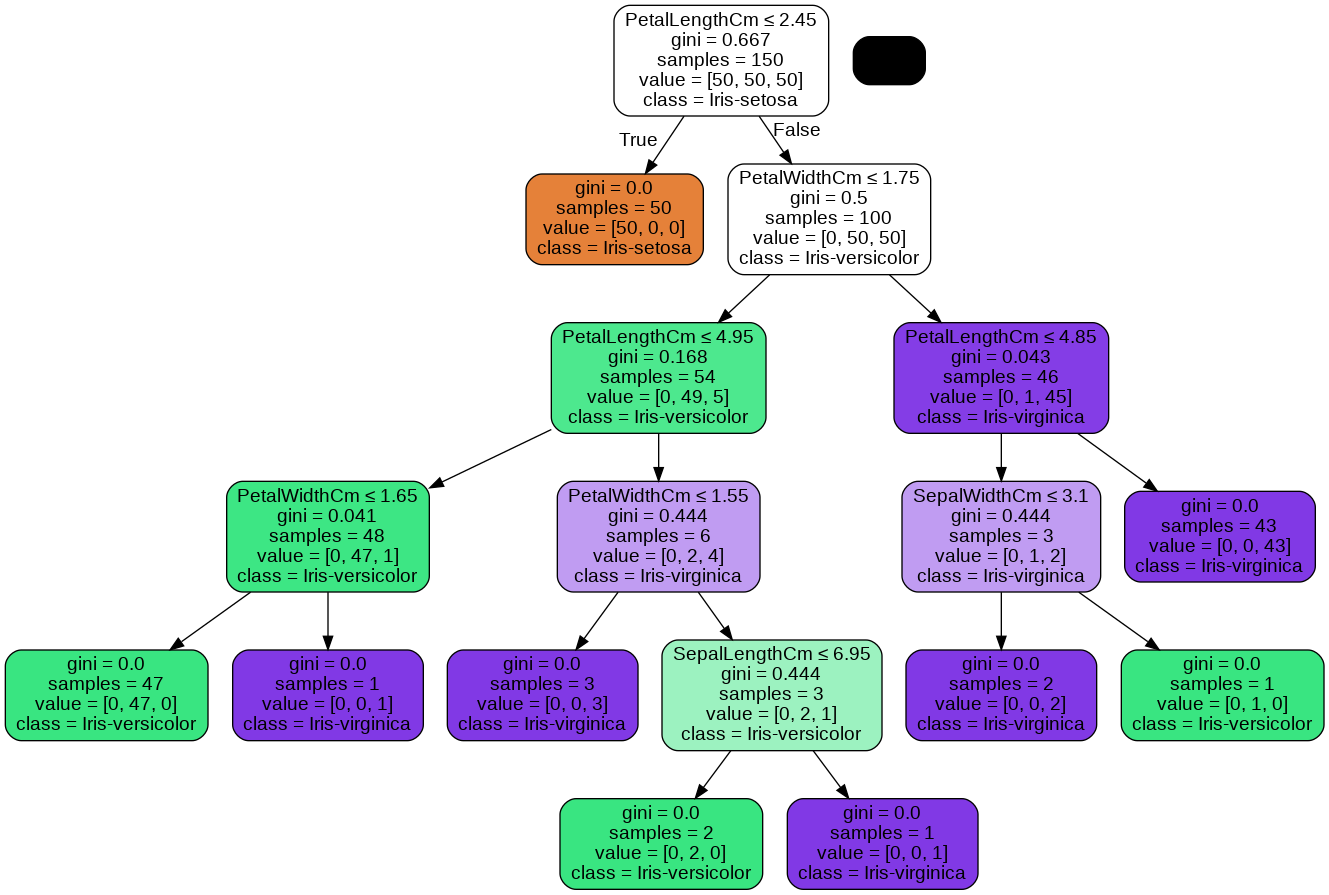

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus #konversi dot file form graphviz ke png agar bisa ditampilkan di jupyter
from six import StringIO  #mmebuat objek file
from IPython.display import Image #menyimpan gambar dari file python ke direktori

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                class_names=['Iris-setosa','Iris-versicolor', 'Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('iris.png')
Image(graph.create_png())